In [2]:
import cv2
from PIL import Image 
import numpy as np
import glob,os
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from moviepy.editor import *

In [4]:
#Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Navigate to the folder containing your images
os.chdir('/content/drive/My Drive/Bird')

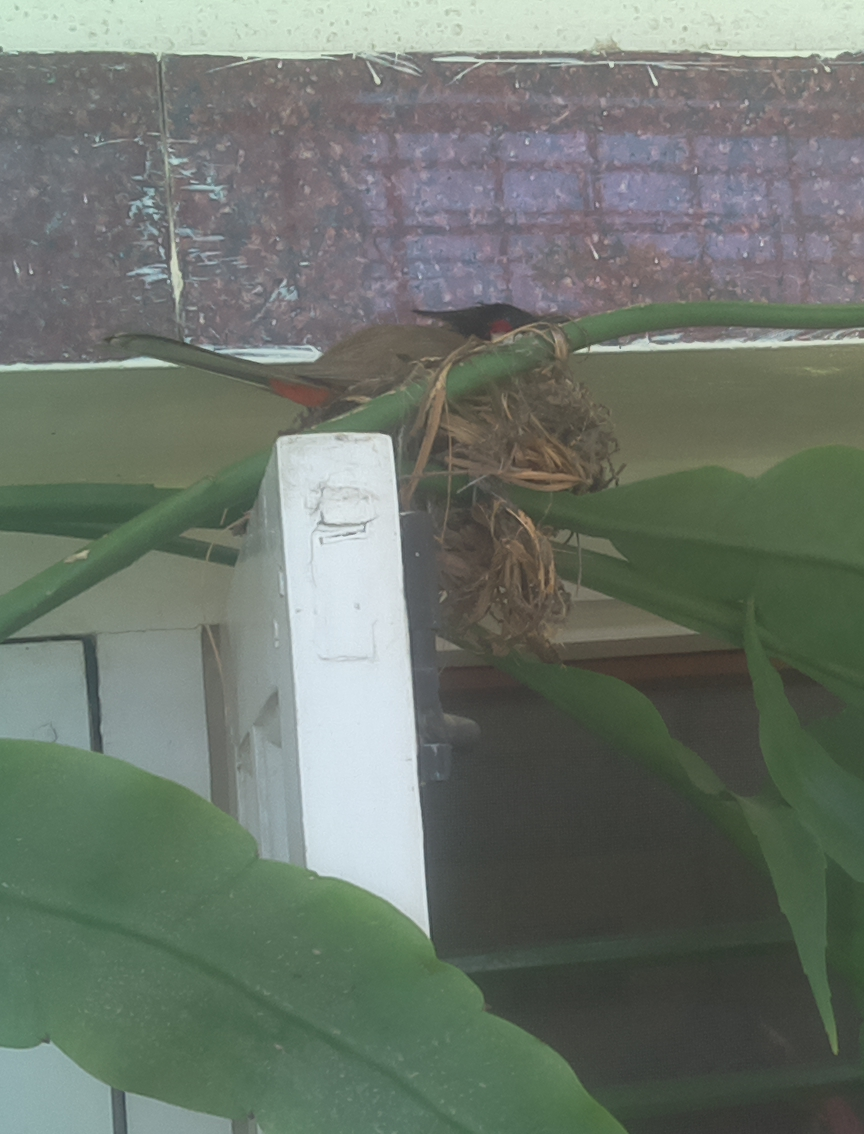

-1

In [8]:
# Try out different values to crop your image 
img = cv2.imread("b_time00001.jpg")
height, width, layers = img.shape

left = width / 4
top = height / 6
right = left + (width/3)
bottom = 3 * height / 4


crop_img = img[int(top):int(bottom), int(left):int(right)]
cv2_imshow( crop_img)
cv2.waitKey(0)

In [18]:
# Write images into multiple video files of mp4 format. You can set the number of images in each video file by changing "threshold"
# All my time lapse images are names as b_time000x.jpg and the numbers are in order of time taken

images = glob.glob('b_time*.jpg')
images.sort()
img_array = []
threshold = 100
framerate = 15
cnt=0

for filename in tqdm(images):
    #print(filename)
    img = cv2.imread(filename)
    crop_img = img[int(top):int(bottom), int(left):int(right)]
    #crop_img=crop_img[::2,::2]
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    #print(cnt,len(img_array))
    
    # This if statement is to prevent a memory overflow
    # It writes 100 images into a mp4 file
    
    if len(img_array) >= threshold:
      out = cv2.VideoWriter('bird'+str(cnt)+'.mp4',cv2.VideoWriter_fourcc(*'MP4V'), framerate , size)
      cnt+=1
      for i in range(len(img_array)):
          out.write(img_array[i])
      out.release()
      print('plant'+str(cnt)+'.mp4')
      img_array=[]
cnt+=1
out = cv2.VideoWriter('bird'+str(cnt)+'.mp4',cv2.VideoWriter_fourcc(*'MP4V'), framerate , size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()



 32%|███▏      | 101/316 [00:17<04:27,  1.25s/it]

plant1.mp4


 64%|██████▎   | 201/316 [00:33<02:11,  1.14s/it]

plant2.mp4


 95%|█████████▌| 301/316 [00:52<00:21,  1.45s/it]

plant3.mp4


100%|██████████| 316/316 [00:54<00:00,  5.83it/s]


In [17]:

# Write all mp4 files into a single file 
L =[]
video_files=glob.glob('bird*.mp4')
video_files.sort()

for files in video_files:
  
  video = VideoFileClip(files)
  L.append(video)

final_clip = concatenate_videoclips(L)
final_clip.to_videofile("output.mp4", fps=24, remove_temp=False)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2097152/45929032 bytes (4.6%)5529600/45929032 bytes (12.0%)9076736/45929032 bytes (19.8%)12763136/45929032 bytes (27.8%)16334848/45929032 bytes (35.6%)19750912/45929032 bytes (43.0%)23216128/45929032 bytes (50.5%)26640384/45929032 bytes (58.0%)30048256/45929032 bytes (65.4%)33406976/45929032 bytes (72.7%)36839424/45929032 bytes (80.2%)40329216/45929032 bytes (87.8%)

100%|██████████| 493/493 [03:06<00:00,  2.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 



In [33]:
# Delete the image files once all of it is converted to video
images = glob.glob('b_time*.png')
images.sort()

for file in images:
  os.remove(file)